# Data Job analysis for Viet Nam market

_**Questions I want to find the answer:**_

>1. How many job posted in Viet Nam have remote working option, degree mention, and insurance guarantee?
>2. What technique skills pay highest and most demand?
>3. Salary distribute between data roles?
>4. Which website have most job posted?
>5. What time of the year have most job posted?


_**Step involves:**_

1. Explore and transform data
2. Visualization
3. Analysis or conclusion for each question


## Import Library:

In [27]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as mticker
from collections import Counter
import seaborn as sns
import datetime as dt
import ast

### Explore and transform data

In [28]:
data = load_dataset('lukebarousse/data_jobs')

df = data['train'].to_pandas()

In [29]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df['job_posted_date'].dt.strftime("%B")
df['job_posted_month_no'] = df['job_posted_date'].dt.strftime("%m")

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_month_no
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June,06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January,01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",October,10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July,07
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",August,08


### Filter job posted in Viet Nam

In [30]:
# All roles data job ở Việt Nam
df_VN = (df[df['job_country'] == 'Vietnam']).copy().reset_index().drop(columns='index', axis=1)

# Data Analyst role job ở Việt Nam
df_DA_VN = df_VN[df_VN['job_title_short'] == "Data Analyst"].copy()
df_DA_VN.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_month_no
3,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"[sql, python, excel]","{'analyst_tools': ['excel'], 'programming': ['...",October,10
9,Data Analyst,Sales Data Analyst (Contractor),"Ho Chi Minh City, Vietnam",via Jobs.vn.indeed.com,Full-time and Contractor,False,Vietnam,2023-12-04 13:30:59,False,False,Vietnam,None,NaN,NaN,Sony Electronics Vietnam,"[sql, vba, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog...",December,12
14,Data Analyst,Marketing Data Analyst,"Ho Chi Minh City, Vietnam",via JobsGO,Full-time,False,Vietnam,2023-02-22 13:38:54,False,False,Vietnam,None,NaN,NaN,Công ty Cổ Phần YouNet,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin...",February,02
29,Data Analyst,Junior Intelligence Analyst,Anywhere,via LinkedIn Vietnam,Full-time,True,Vietnam,2023-03-21 13:39:27,True,False,Vietnam,None,NaN,NaN,ActiveFence,[sheets],{'analyst_tools': ['sheets']},March,03
35,Data Analyst,[SO] Senior Data Analyst,Vietnam,via AI Careers,Full-time,False,Vietnam,2023-05-30 13:16:07,True,False,Vietnam,None,NaN,NaN,Bosch Group,None,None,May,05


---

In [48]:
job_posted = df_VN.groupby(['job_posted_month', 'job_posted_month_no'], as_index=False)['job_title']\
        .count().sort_values(by='job_posted_month_no', ascending=True)\
        .set_index('job_posted_month').drop('job_posted_month_no', axis=1)
        
job_posted

,job_title
job_posted_month,
January,216
February,135
March,144
April,169
May,111
June,165
July,135
August,154
September,150


---

### 1. How many job posted in Viet Nam have remote working option, degree mention, and insurance guarantee?

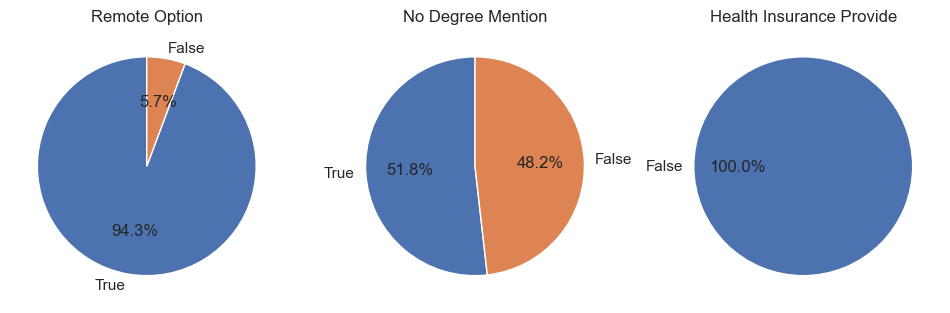

In [32]:
dict_cols = {
    "job_work_from_home": "Remote Option",
    "job_no_degree_mention": "No Degree Mention",
    "job_health_insurance": "Health Insurance Provide"
}

sns.set_theme(style='ticks')

fig, ax = plt.subplots(1,3, figsize=(12,9))
for i, (column, title) in enumerate(dict_cols.items()):
    unique_values = df_DA_VN[column].unique()
    if len(unique_values) > 1:
        ax[i].pie(df_DA_VN[column].value_counts(), labels=['True', 'False'], autopct='%1.1f%%', startangle=90)
        ax[i].set_title(title)
    else:
        # Handle the case of only one unique value (e.g., display a text message)
        ax[i].pie(df_DA_VN[column].value_counts(), labels=['False'], autopct='%1.1f%%')
        ax[i].set_title(title)

> - All company in Viet Nam have coverred Health Insurance for their employees. 
> - Only about 5.7% company in Viet Nam have remote working option
> - DA job that not demand degree in Viet Nam is about 51.8%

----


### n. What job skills appeared the most in job posted?

In [33]:
# format currency:
format_thousand = mticker.FuncFormatter(lambda x, pos: f'${x/1000}k')

In [34]:
from adjustText import adjust_text

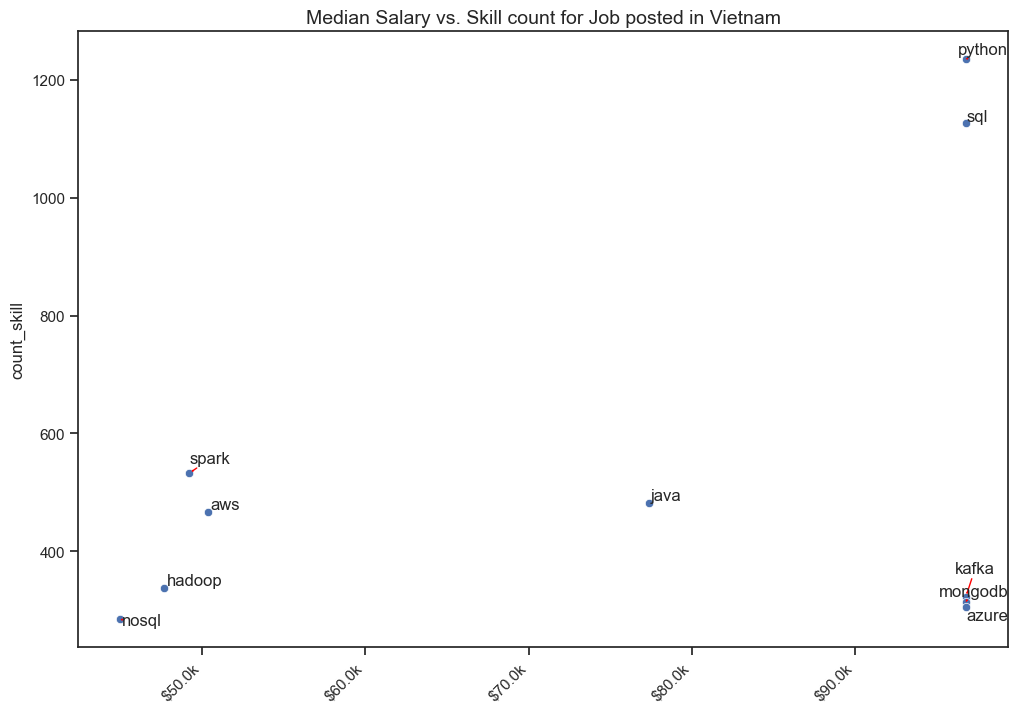

In [35]:
df_exploded = df_VN.explode('job_skills').copy()

df_scatter = df_exploded.groupby('job_skills').agg(
    count_skill = ('job_skills', 'size'),
    median_salary = ('salary_year_avg', 'median')
)

fig, ax = plt.subplots(figsize=(12,8))

df_scatter = df_scatter.sort_values(by='count_skill', ascending=False).head(10)

sns.scatterplot(data=df_scatter, x=df_scatter['median_salary'], y=df_scatter['count_skill'], ax=ax)

# Format part:

ax.xaxis.set_major_formatter(format_thousand)
ax.set_xlabel("")
plt.title('Median Salary vs. Skill count for Job posted in Vietnam', fontsize=14)
plt.xticks(rotation=45, ha='right')

texts = []
for i, txt in enumerate(df_scatter.index):
    texts.append(plt.text(x=df_scatter['median_salary'].iloc[i], y=df_scatter['count_skill'].iloc[i], s=txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

----

### 2. What technique skills pay highest and most demand?

In [36]:
df_scatter_mean = df_exploded.groupby('job_skills').agg(
    count_skill = ('job_skills', 'size'),
    mean_salary = ('salary_year_avg', 'mean')
).sort_values(by="mean_salary", ascending=False)

df_scatter_mean

,count_skill,mean_salary
job_skills,,
javascript,79,200000.000000
mxnet,8,200000.000000
opencv,15,200000.000000
flow,117,153924.333333
fastapi,31,147500.000000
...,...,...
vue.js,4,NaN
watson,2,NaN
wsl,1,NaN


In [37]:
top_salary = df_scatter_mean.sort_values(by='mean_salary', ascending=False).head(5)

top_skill = df_scatter_mean.sort_values(by='count_skill', ascending=False).head(5).sort_values(by='mean_salary', ascending=False).head(5)

In [38]:
top_skill

,count_skill,mean_salary
job_skills,,
python,1235,97810.222222
sql,1127,97432.680000
java,482,76874.150000
spark,532,64191.900000
aws,467,62016.600000


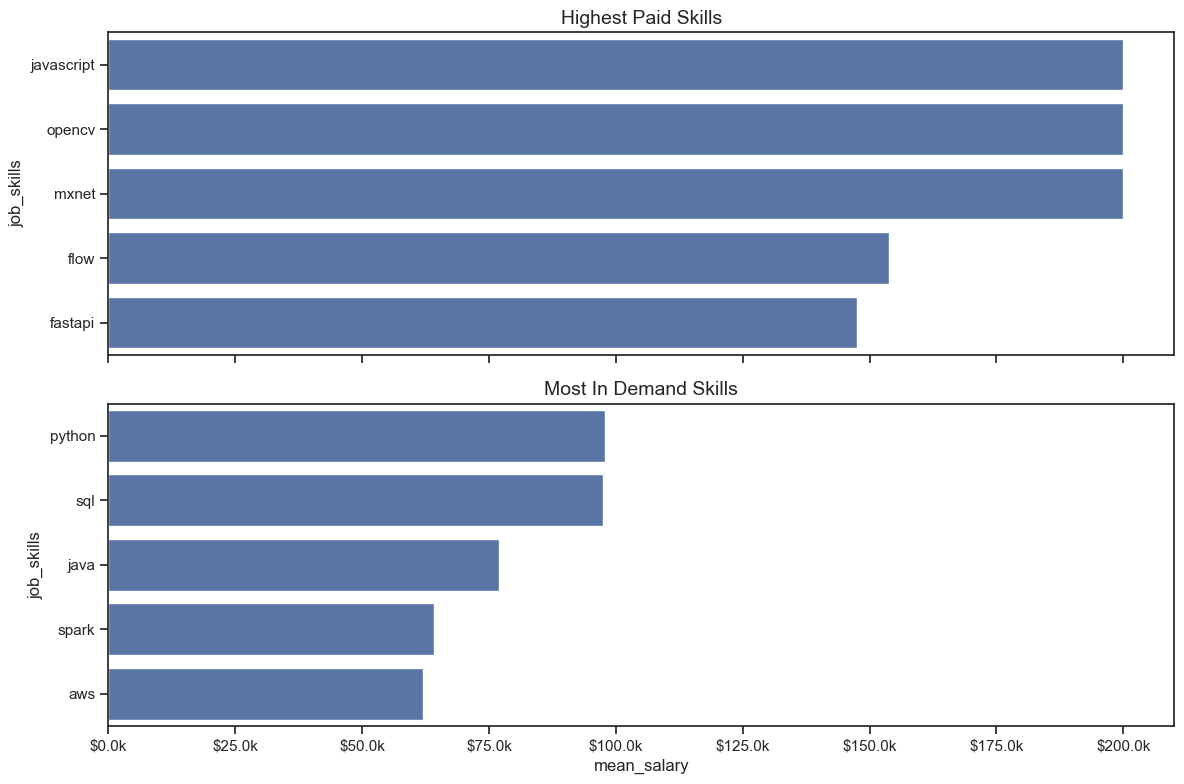

In [39]:
f, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

dta = [
    (top_salary, 'mean_salary'),
    (top_skill, 'mean_salary')
]

for i, (dta_frame, column) in enumerate(dta):
    sns.barplot(dta_frame, x=column, y='job_skills', ax=ax[i], orient='h')
    ax[i].xaxis.set_major_formatter(format_thousand)
    # ax[i].set_title()

ax[0].set_title("Highest Paid Skills", fontsize=14)

ax[1].set_title("Most In Demand Skills", fontsize=14)
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()  
plt.show()  

### 5. What time of the year have most job posted?

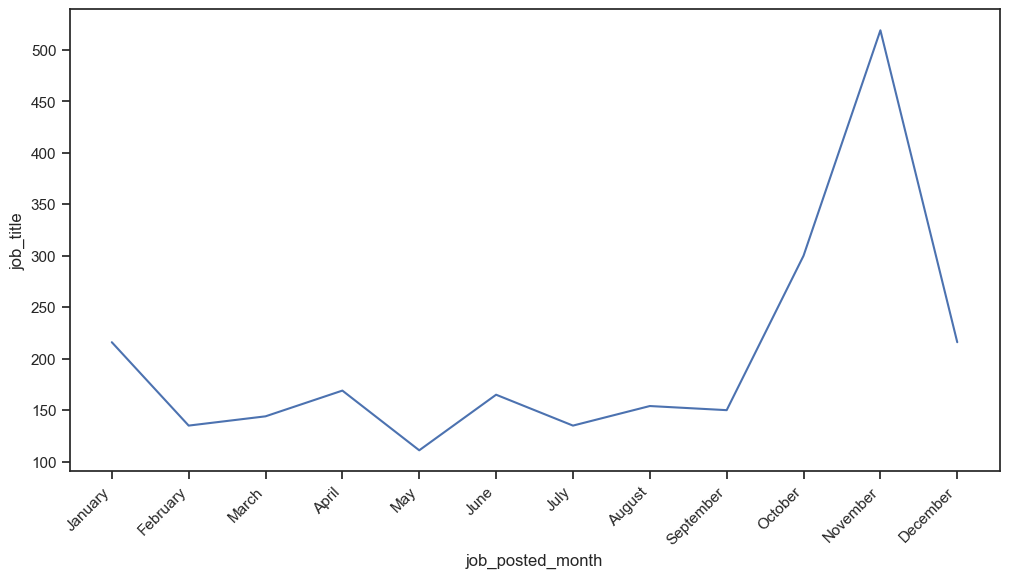

In [57]:
plt.figure(figsize=(12,6))
# ax = plt.gca()

sns.lineplot(
    data=job_posted,
    x='job_posted_month',
    y='job_title'
)

plt.xticks(rotation=45, ha='right')
plt.show()